## SVM classifier


Large margin classifier. 


### Goal is to find the best separating hyperplane


<img src="http://weknowmemes.com/wp-content/uploads/2014/03/welcome-to-hell-dog-gif.png" />


### Initial max margin problem

<img src="l4_data/maxmargin.png"/>

<img src="l4_data/svm-1.png"/>

### Set margin constant to 1 And do some W scaling with multiplication. 
### s.t. Is essentially our hypothesis function
<img src= "l4_data/svm-3.png" height=600 width=600/>

### After doing A LOT OF MATH we will come to this optimization problem 
### (Lagrange duality - http://cs229.stanford.edu/notes/cs229-notes3.pdf)
### Wiki (really usefull) - https://en.wikipedia.org/wiki/Support_vector_machine
<img src= "l4_data/svm-4.png" height=600 width=600/>

### Prediction function 
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/e6096cb2a74a383da07b30358635f7a99ba461e4"/>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, rosen, rosen_der

In [24]:
# x = np.array([
#     [1, 1],
#     [1, 2],
#     [2.5, 3.3],
#     [2.1, 1],
#     [4, 3],
    
#     [5.5, 1],
#     [7.9, 5],
#     [7.5, 10],
#     [8, 2.5]
# ])

# y = np.array([
#     1, 1, 1, 1, 1, -1, -1, -1, -1
# ])

In [61]:
#Radial
x = np.array([
    [5, 5],
    [4, 5],
    [6, 5],
    [5, 6],
    [5, 4],
    
    [8.0, 8],
    [3, 2],
    [1, 10],
    [7, 3]
])

y = np.array([
    1, 1, 1, 1, 1, -1, -1, -1, -1
])

In [62]:
for i in range(x.shape[1]):
    x[:,i] = x[:,i] / x[:,i].max()

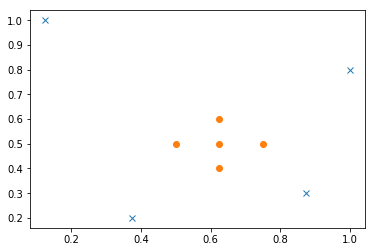

In [63]:
def line(theta):
    def foo(x):
        return (theta[1] * x + theta[0]) / (- theta[2])
    return foo
plt.plot(x[np.where(y==-1)][0:,0], x[np.where(y==-1)][0:,1], 'x')
plt.plot(x[np.where(y==1)][0:,0], x[np.where(y==1)][0:,1], 'o')
plt.show()


In [64]:
# Kernels

In [65]:
def linear_kernel(x_test, x):
    return np.dot(x_test, x.T)

In [160]:
def polynomial_kernel(x_test, x, d = 3):
    return np.power((1 + np.dot(x_test, x.T)), d)

In [161]:
def radial_kernel(x_test, x, sigma = 50):
    m, f = x.shape
    m1, f1 = x_test.shape
    
    res = np.empty((m,m1))
    for row in range(m1):
        x0 = x_test[row]
        for stack in range(m - 1):
            x0 = np.vstack((x0, x_test[row]))
        col = np.sum(np.power(np.subtract(x, x0), 2), axis = 1)
        res[0:,row] = col
        
    return np.exp(res * -sigma).T

In [162]:
# Hypothesis
def h(alpha, b, y, x_test, x, kernel = linear_kernel):
    return np.sum(alpha * y * kernel(x_test, x), axis = 1) + b


In [163]:
def train(x, y, C = None, kernel = linear_kernel, epsi = 0.01):
    size = len(y)
    lowbound = [(0, C) for i in range(size)]
    alpha = np.zeros(size)
#     Optimization objective
    def objective(alpha):
        m, features = x.shape
        second_term = np.sum((y * y.reshape(-1,1)) * (alpha * alpha.reshape(-1,1)) * kernel(x, x)) / 2
        return -(np.sum(alpha) - second_term)
#     Conditions
    def condition2(alpha):
        return np.sum(alpha * y)
    
    optim = minimize(objective, alpha, method = 'SLSQP', \
                     bounds=lowbound, constraints = [{'type': 'eq', 'fun': condition2}])
    print(optim)
    alpha = optim.x    
    w = np.sum(np.column_stack((alpha[alpha > epsi] * y[alpha > epsi], alpha[alpha > epsi] * y[alpha > epsi])) * x[alpha > epsi], axis = 0)
    test = h(alpha, 0 , y, x, x, kernel)
    b = -(np.sum(alpha * y * kernel(x, x), axis = 1)).mean()
    return (w, b, alpha)
    
    

In [164]:
w, b, alpha = train(x, y, C = 1, kernel=radial_kernel)

     fun: -3.092509241187177
     jac: array([ 0.61698785,  0.24771926,  0.24765638,  0.24762321,  0.24759266,
       -0.24743974, -0.24744749, -0.24743927, -0.24750885])
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.        ,  0.82788587,  0.8776042 ,  0.67861862,  0.70869638,
        0.75306861,  0.760994  ,  0.75256071,  0.82618174])


In [167]:
def bound(alpha, b, y, x, ikernel = linear_kernel):
    xs = np.arange(0, 1, 0.005)
    ys = np.arange(0, 1, 0.005)
    pts = []
    for i in xs:
        for j in ys:
            if np.abs(h(alpha, b, y, np.array([[i, j]]), x, kernel=ikernel)) < 0.01:
                pts.append((i, j))
    return pts

In [168]:
bounds = bound(alpha, b, y, x, ikernel=radial_kernel)

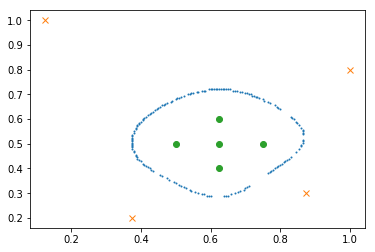

In [169]:

plt.plot(np.array(bounds)[0:,0], np.array(bounds)[0:,1],'o', markersize=1)
plt.plot(x[np.where(y==-1)][0:,0], x[np.where(y==-1)][0:,1], 'x')
plt.plot(x[np.where(y==1)][0:,0], x[np.where(y==1)][0:,1], 'o')
plt.show()